# Project 2: 
# Economic Guide to picking College Majors
---

We're exploring how to utilize the pandas plotting functionality in the Jupyter notebook interface which would help us quickly explore data using visualizations.

Click [here](http://www.census.gov/programs-surveys/acs/data/pums.html) to check out the pdf on the job outcomes of students who graduated from college between 2010 and 2012. FiveThirtyEight cleaned the dataset originally released by American Community Survey and released a [story](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/) on it.

Headers for `recent-grads.csv` are shown below:

Header | Description|
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnings
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs

### Importing necessary packages, modules
---

Getting a glimpse of the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading the dataset
recent_grads = pd.read_csv('recent-grads.csv')

#getting a glimpse of data
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In order to create a summary statistics for all of the numeric columns, we will use the `describe()` function

In [4]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

### Basic Inference
---

The dataset shows the ranking of various College Majors based on their median earning values. It is ordered in the descending order of earnings. The first ranked major has the highest median earning and the lowerst median earning is ranked the last.

The first row has Petroleum Engineering, a major that falls under Engineering disciplines has the highest median earning among all other majors listed here. Only 12% are women in it. Women constitute to below 15% in other high paying majors except for the 5th rank, Chemical engineering. The lowest paying majors, on the other hand, has very high % of women almost reaching 88% in some case.

Further, let's look at the descriptive statistics..

In [22]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Dropping rows with missing values
---

We need to remove rows containing null values. Matplotlib expects that columns of values that we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [5]:
#number of rows in the dataset
print('Before dropping missing values: ', recent_grads.shape[0])

#drop rows containing missing values, further assign the 
#resulting DataFrame back to `recent_grads`
recent_grads = recent_grads.dropna()
print('After dropping missing values: ', recent_grads.shape[0])

Before dropping missing values:  173
After dropping missing values:  172


We can check the object types of the columns also via the `info()` function

In [23]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

### Plotting in Pandas
---

The plotting functionality in pandas is contained within the `Series.plot()` method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the `kind` parameter to specify the type of plot we want. We use `x` and `y` to specify the data we want on each axis.

#### Scatter Plots

#### Most Popular Major v/s (Un)Employment

Let us first go after **the popular majors**. We have a `Total` column in our dataset which represents the total number of students enrolled for a certain major. If we can find the major with highest value of total, that would be the most popular major. 

Will there be a reason for the popularity of the major? Will it be employment opportunity or the high salary? What factors could be contributing to the popularity. Let us get some visualization and check that.

**Most Popular Major v/s All Year Round Employement**

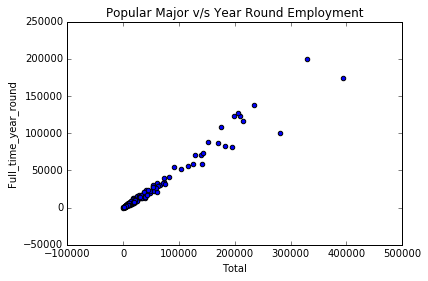

In [24]:
#Scatter Plot to find the correlation between Popular Major (Total) and All Year Round Employement(Full_time_year_round)

a1=recent_grads.plot('Total', 'Full_time_year_round', kind='scatter', 
                     title="Popular Major v/s Year Round Employment")

Some strong correlation and almost linear relationship between the variables. As the popularity of the major increases (as the total number of students in a certain major increases) the number of students who got Full time job, year round also increased with a few exceptions.

Hence, some of these majors are popular for a reason. We can cross check it by comparing both the employment and unemployment rates as well.

**Most Popular Major v/s Total Number Employed**

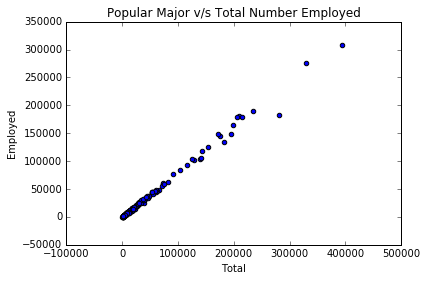

In [25]:
a2=recent_grads.plot('Total', 'Employed', kind='scatter', 
                     title="Popular Major v/s Total Number Employed")

It looks like the strong correlation between most popuLar major and getting employed are still strongly related. So now all we have to check is if the opposite is also true, i.e. if increase in popularity decreases the number of unemployed.

**Most Popular Major v/s Unemployement rate**

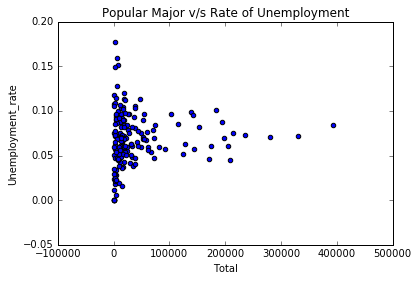

In [26]:
a3=recent_grads.plot('Total', 'Unemployment_rate', kind='scatter', 
                     title="Popular Major v/s Rate of Unemployment")

Though the correlation is not as strong as the others, we can clearly see that for less popular majors, the unemployment rate is quite concentrated, some are very high, some are how but majority of them are in the middle. So probably because of this very reason, these majors are taken up by less people.

Now that we have infered one of the possible reasons behind certain majors being less popular, let us go ahead and see if popular major also translated into better earning opportunities.

**Most Popular Major v/s Earning Potential**

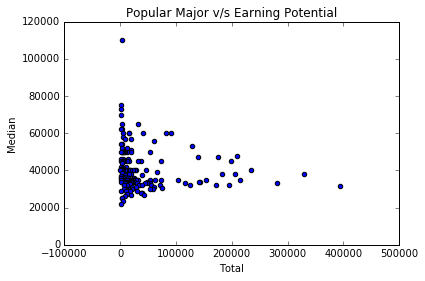

In [27]:
a4=recent_grads.plot('Total', 'Median', kind='scatter', 
                     title="Popular Major v/s Earning Potential")

This is a rather surprising result. Looks like the least popular majors actually have more income potential from this data. This could mean a few things

- The least popular major can be hard to get in majors or very specialised major and offers great earning potential
- The most popular jobs offer better employment, at the same time due to oversaturation the earning potential is lesser for such majors.
- Or the sample size is too small to make right predictions.

**Sample Size v/s Earning Potential**

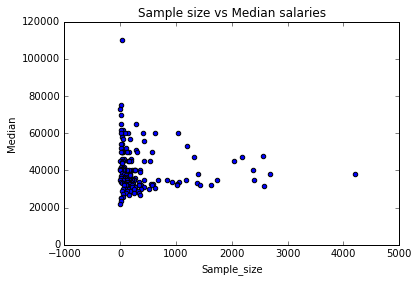

In [28]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter', \
                  title = 'Sample size vs Median salaries')

Looks like there are not much relationship between sample size and earning median. But we can see that if the sample size is small, there are more higher values. This could be due to low number of sample data.

In [29]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total').head(10)

,Major,Total,Sample_size,Median
73,MILITARY TECHNOLOGIES,124.0,4,40000
52,MATHEMATICS AND COMPUTER SCIENCE,609.0,7,42000
112,SOIL SCIENCE,685.0,4,35000
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,5,50000
1,MINING AND MINERAL ENGINEERING,756.0,7,75000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,5,34000
55,SCHOOL STUDENT COUNSELING,818.0,4,41000
2,METALLURGICAL ENGINEERING,856.0,3,73000
172,LIBRARY SCIENCE,1098.0,2,22000
19,COURT REPORTING,1148.0,14,54000


This table is quite interesting since this 10 values the highest paying major and the lowest paying job are included.

This table is created in the ascending order of Popularity (or total number of students).

This table tells us that popularity or the course doesn't have much to do with earning option because the 5th least popular major according to the data earns the most and the 8th least popular major earns the 2nd highest.

At the same time, the 9th least major earns the least amount of salary. But the interesting thing in all these three observations are, the sample size available is very less. We are inferring things from 2,3 and 7 sample sets!

In [30]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total', ascending=False).head(10)

,Major,Total,Sample_size,Median
145,PSYCHOLOGY,393735.0,2584,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,4212,38000
123,BIOLOGY,280709.0,1370,33400
57,GENERAL BUSINESS,234590.0,2380,40000
93,COMMUNICATIONS,213996.0,2394,35000
34,NURSING,209394.0,2554,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,2684,38000
40,ACCOUNTING,198633.0,2042,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,1436,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,1387,38000


Let us quickly have a look at the majors with highest number of people enrolled. Psychology appears to be the most popular major but clearly it is not the highest earner. In fact out of the top 10 popular majors, the first 30 highest earning majors are not present. So with almost a good certainty we can say that popularity of the majors and earning potential don't have much correlation.

The only solid *conclusion* we can arrive from these observations is that Total number enrolled in a major can't be considered to be the popularity of the subject and it the correlation between Total people enrolled and its earning potential can't be accurately predicted with such small numbers of sample size.

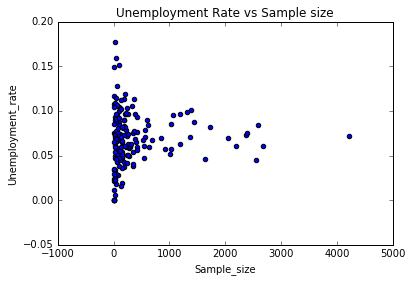

In [31]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'Unemployment Rate vs Sample size')

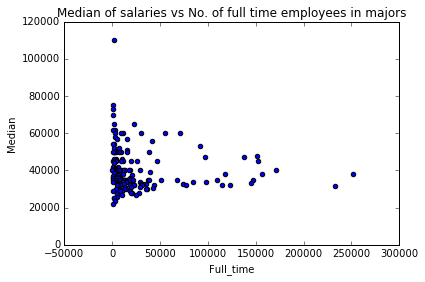

In [8]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter',
                  title = 'Median of salaries vs No. of full time employees in majors')

#### Gender Bias and Earning Potential

With the given data, now let us explore if there is any gender biases with the earning potential. Are women getting paid more than men or is it the opposite? We will try to explore these points using scatter plot

**Percentage of Women v/s Earning Potential**

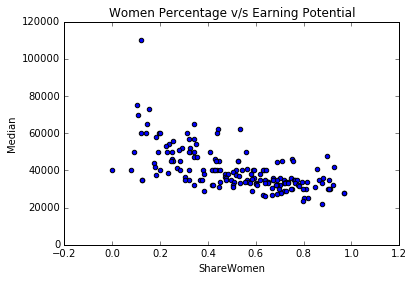

In [32]:
recent_grads.plot('ShareWomen','Median', kind='scatter', 
                  title="Women Percentage v/s Earning Potential")

There is a weak correlation between percentage of women and their earning potential. As the percentage of women increased in a certain major, the earning potential gradually decreased. So it says, the majors with majority of women are tend to get paid less and the opposite is also seems to be right. The subjects where men are a majority tend to get paid more. Probably some of the male dominated and more riskier job profiles pays more. We can verify it with the table below.

In [33]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values('ShareWomen').head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
73,MILITARY TECHNOLOGIES,124.0,0.0,4,40000,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4419.0,371.0,71,40000,0.077453
26,CONSTRUCTION SERVICES,16820.0,1678.0,295,50000,0.090713
1,MINING AND MINERAL ENGINEERING,679.0,77.0,7,75000,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0,16,70000,0.107313
8,MECHANICAL ENGINEERING,80320.0,10907.0,1029,60000,0.119559
0,PETROLEUM ENGINEERING,2057.0,282.0,36,110000,0.120564
106,TRANSPORTATION SCIENCES AND TECHNOLOGIES,13257.0,1893.0,180,35000,0.124950
111,FORESTRY,3156.0,451.0,48,35000,0.125035
11,AEROSPACE ENGINEERING,12953.0,2105.0,147,60000,0.139793


In [34]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values(
    'ShareWomen', ascending=False).head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
164,EARLY CHILDHOOD EDUCATION,1167.0,36422.0,342,28000,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,1225.0,37054.0,95,28000,0.967998
51,MEDICAL ASSISTING SERVICES,803.0,10320.0,67,42000,0.927807
138,ELEMENTARY EDUCATION,13029.0,157833.0,1629,32000,0.923745
150,FAMILY AND CONSUMER SCIENCES,5166.0,52835.0,518,30000,0.910933
100,SPECIAL NEEDS EDUCATION,2682.0,26057.0,246,35000,0.906677
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,885.0,8489.0,89,30000,0.905590
151,SOCIAL WORK,5137.0,48415.0,374,30000,0.904075
34,NURSING,21773.0,187621.0,2554,48000,0.896019
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,1589.0,11797.0,81,36000,0.881294


One of the top 5 high paying jobs, the women participation is less than 15 percentage. The majors where women percentage is more than 90%, except for one major all the others are in the last 72 ranks in terms of earning potential.

Here the *conclusion* we can draw is that some of the male dominated professions earn way more than women dominated majors.

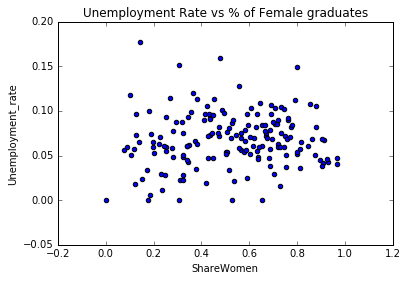

In [9]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter', title = 'Unemployment Rate vs % of Female graduates')

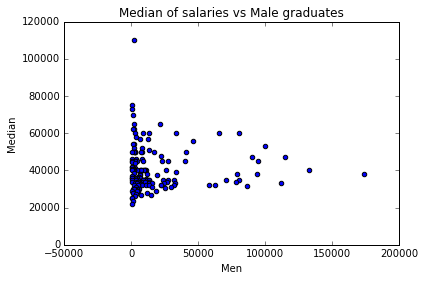

In [10]:
recent_grads.plot(x='Men', y='Median', kind='scatter', \
                  title = 'Median of salaries vs Male graduates')

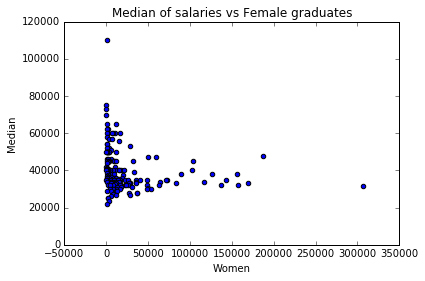

In [11]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title = 'Median of salaries vs Female graduates')

Using the plots, we explore the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

#### Histogram

To explore the distribution of values in a column, we can select it from the DataFrame, call `Series.plot()`, and set the `kind` parameter to `hist`

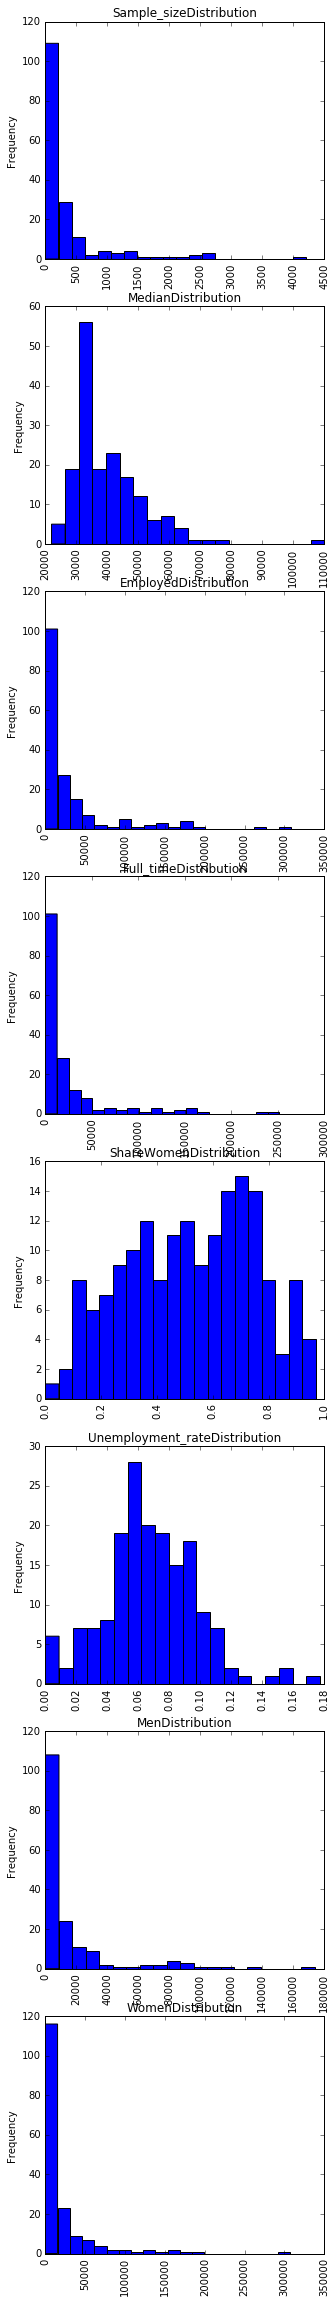

In [20]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time',
        'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize = (5,40))

for i in range(len(cols)):
    ax = fig.add_subplot(len(cols),1, i+1)
    recent_grads[cols[i]].plot(kind = 'hist', rot = 90, bins = 20)
    ax.set_title(str(cols[i]) + "Distribution")

### Scatter Matrix
---

A **scatter matrix** plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of `n` by `n` plots on a grid, where `n` is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4702104630>,
      dtype=object)

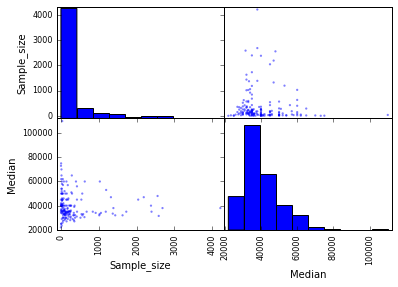

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4701b919b0>,
      dtype=object)

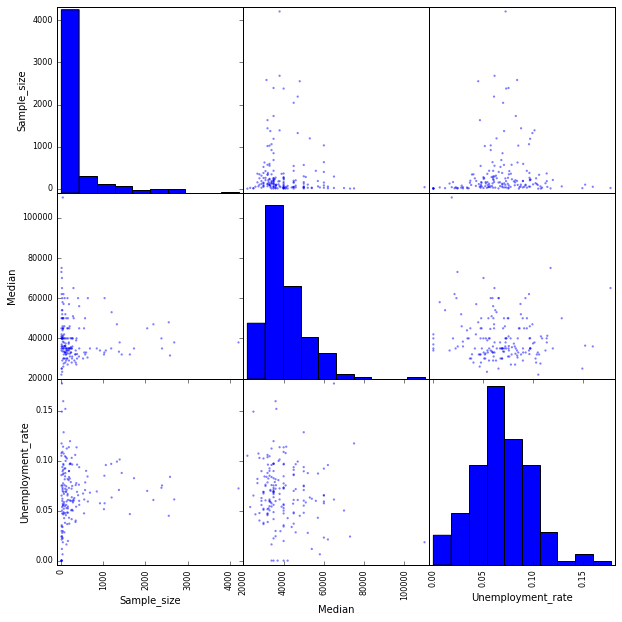

In [14]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

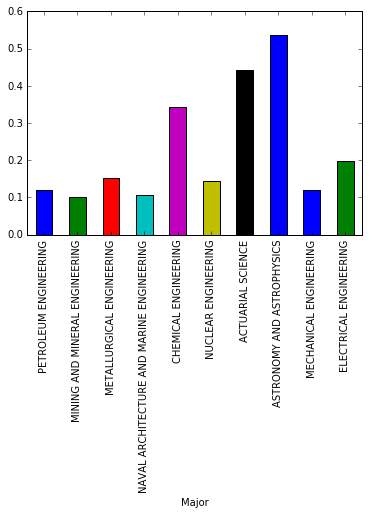

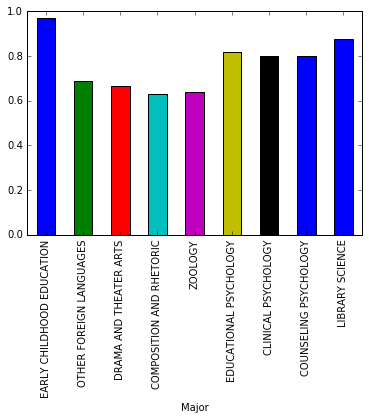

In [21]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)